In [1]:
include("MDPModelFunctions.jl")
using StatsBase
using PythonPlot

#### Simulate Delayed Memory Paradigm

In [2]:

N_Object_Vals = [2, 3, 4, 5]
NO = length(N_Object_Vals)
Quanta_Vals = [2, 3, 5, 7]
NQ = length(Quanta_Vals)
eps_vals = [.1, .5, .9]
NE = length(eps_vals)

N_TimeSteps = 1000

prob_remember_object_eps_quant = zeros(N_TimeSteps, NO, NQ, NE)

for obj_idx = 1:NO
    print(string("N_Objects: ", N_Object_Vals[obj_idx]))

    
    for eps_idx in 1:NE

        print(string("Epsilon: ", eps_vals[eps_idx]))

        for q_idx in 1:NQ
            
            N_Objects = N_Object_Vals[obj_idx]

            print(string("Num. Quanta: : ", Quanta_Vals[q_idx]))

            N_Quanta = Quanta_Vals[q_idx]
            epsilon = eps_vals[eps_idx]

            prob_remember_object = simulate_delayed_memory(N_Quanta, N_Objects, epsilon, N_TimeSteps)

            prob_remember_object_eps_quant[:,obj_idx, q_idx, eps_idx] = prob_remember_object[:,2]
            
        end
    end
end


N_Objects: 2Epsilon: 0.1Num. Quanta: : 2Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 3Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 5Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 7Generating All States
Computing Optimal Policy
Simulating Episode
Epsilon: 0.5Num. Quanta: : 2Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 3Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 5Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 7Generating All States
Computing Optimal Policy
Simulating Episode
Epsilon: 0.9Num. Quanta: : 2Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 3Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 5Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 7Generating All States
Computing Op

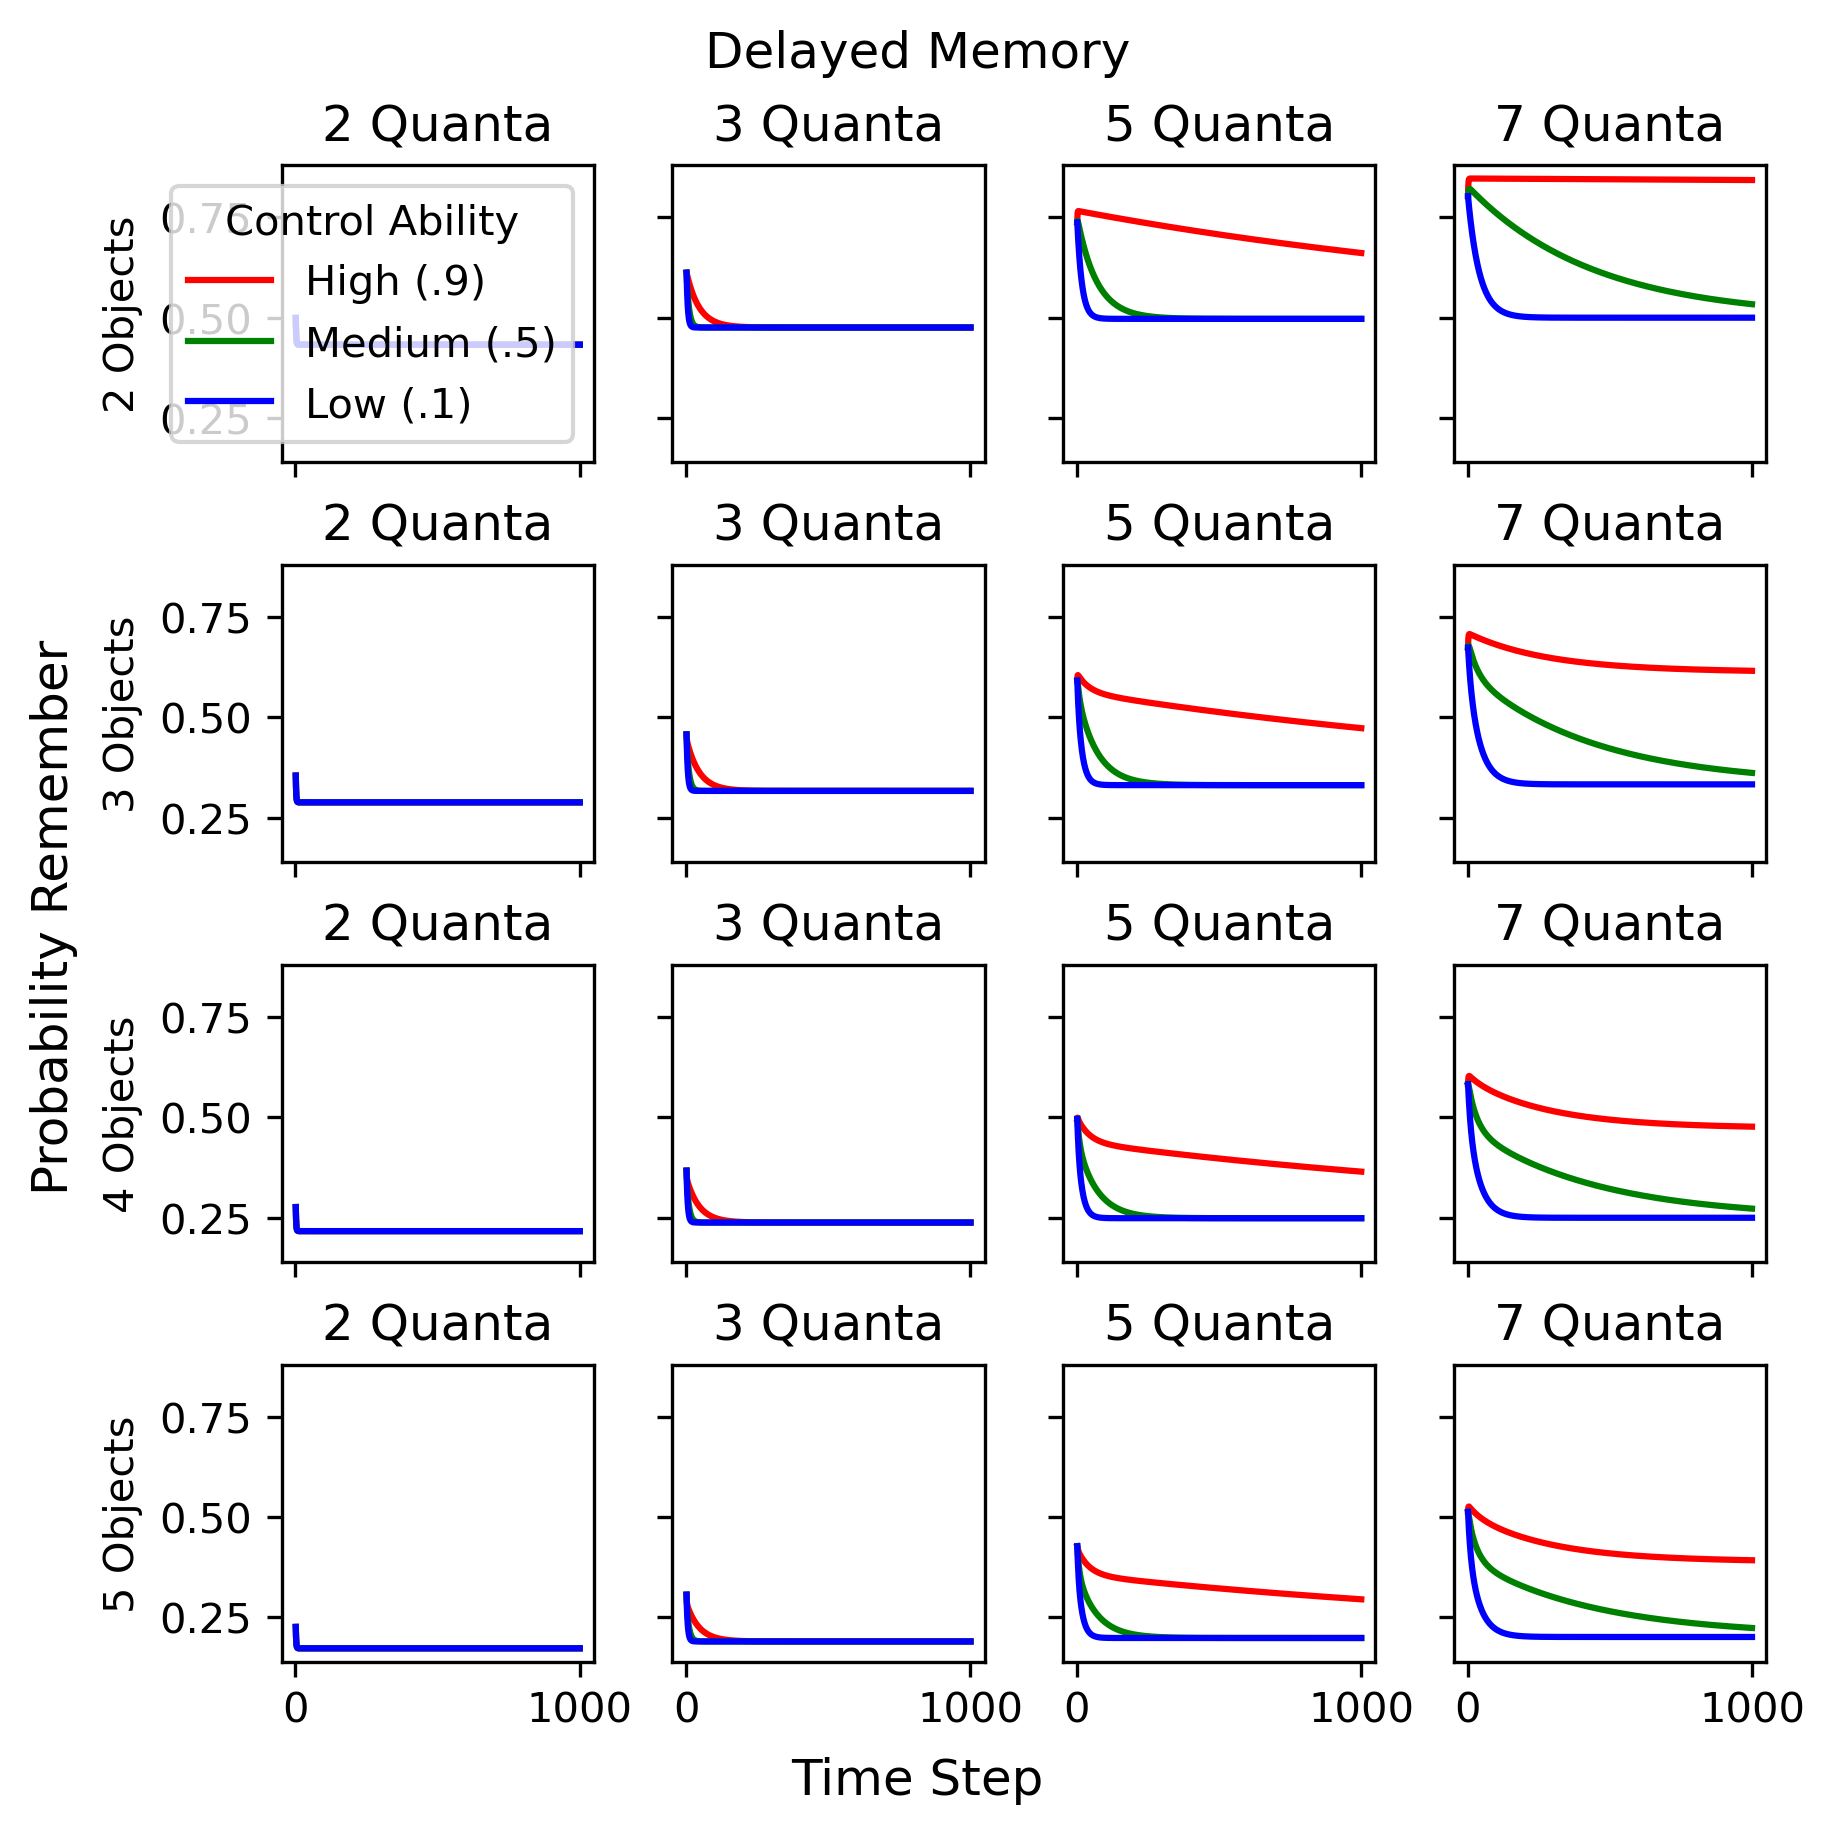

Python: None

In [3]:
colors = ["r", "g", "b"]


eps_label = ["High (.9)", "Medium (.5)", "Low (.1)"]

fig,ax = subplots(NO, NQ, figsize=(6,6), dpi=300, constrained_layout=true, sharey=true, sharex = true)
for obj_idx = 1:NO
    for q_idx in 1:NQ
        for eps_idx in 1:NE
            ax[obj_idx - 1, q_idx-1].plot(1:N_TimeSteps, prob_remember_object_eps_quant[:,obj_idx, q_idx,eps_idx], label = eps_label[eps_idx], c = colors[eps_idx])
        end
        # ax[q_idx-1].set_xlabel("Time Step")
        ax[obj_idx-1,q_idx-1].set_title(string(Quanta_Vals[q_idx], " Quanta"))
        

    end
    ax[obj_idx-1,0].set_ylabel(string(N_Object_Vals[obj_idx], " Objects"))

end

ax[0,0].legend(title = "Control Ability")
fig.suptitle("Delayed Memory")
# ax[0].set_ylim(.55,.85)

fig.supxlabel("Time Step")
fig.supylabel("Probability Remember")

savefig("DelayedMemory.png")

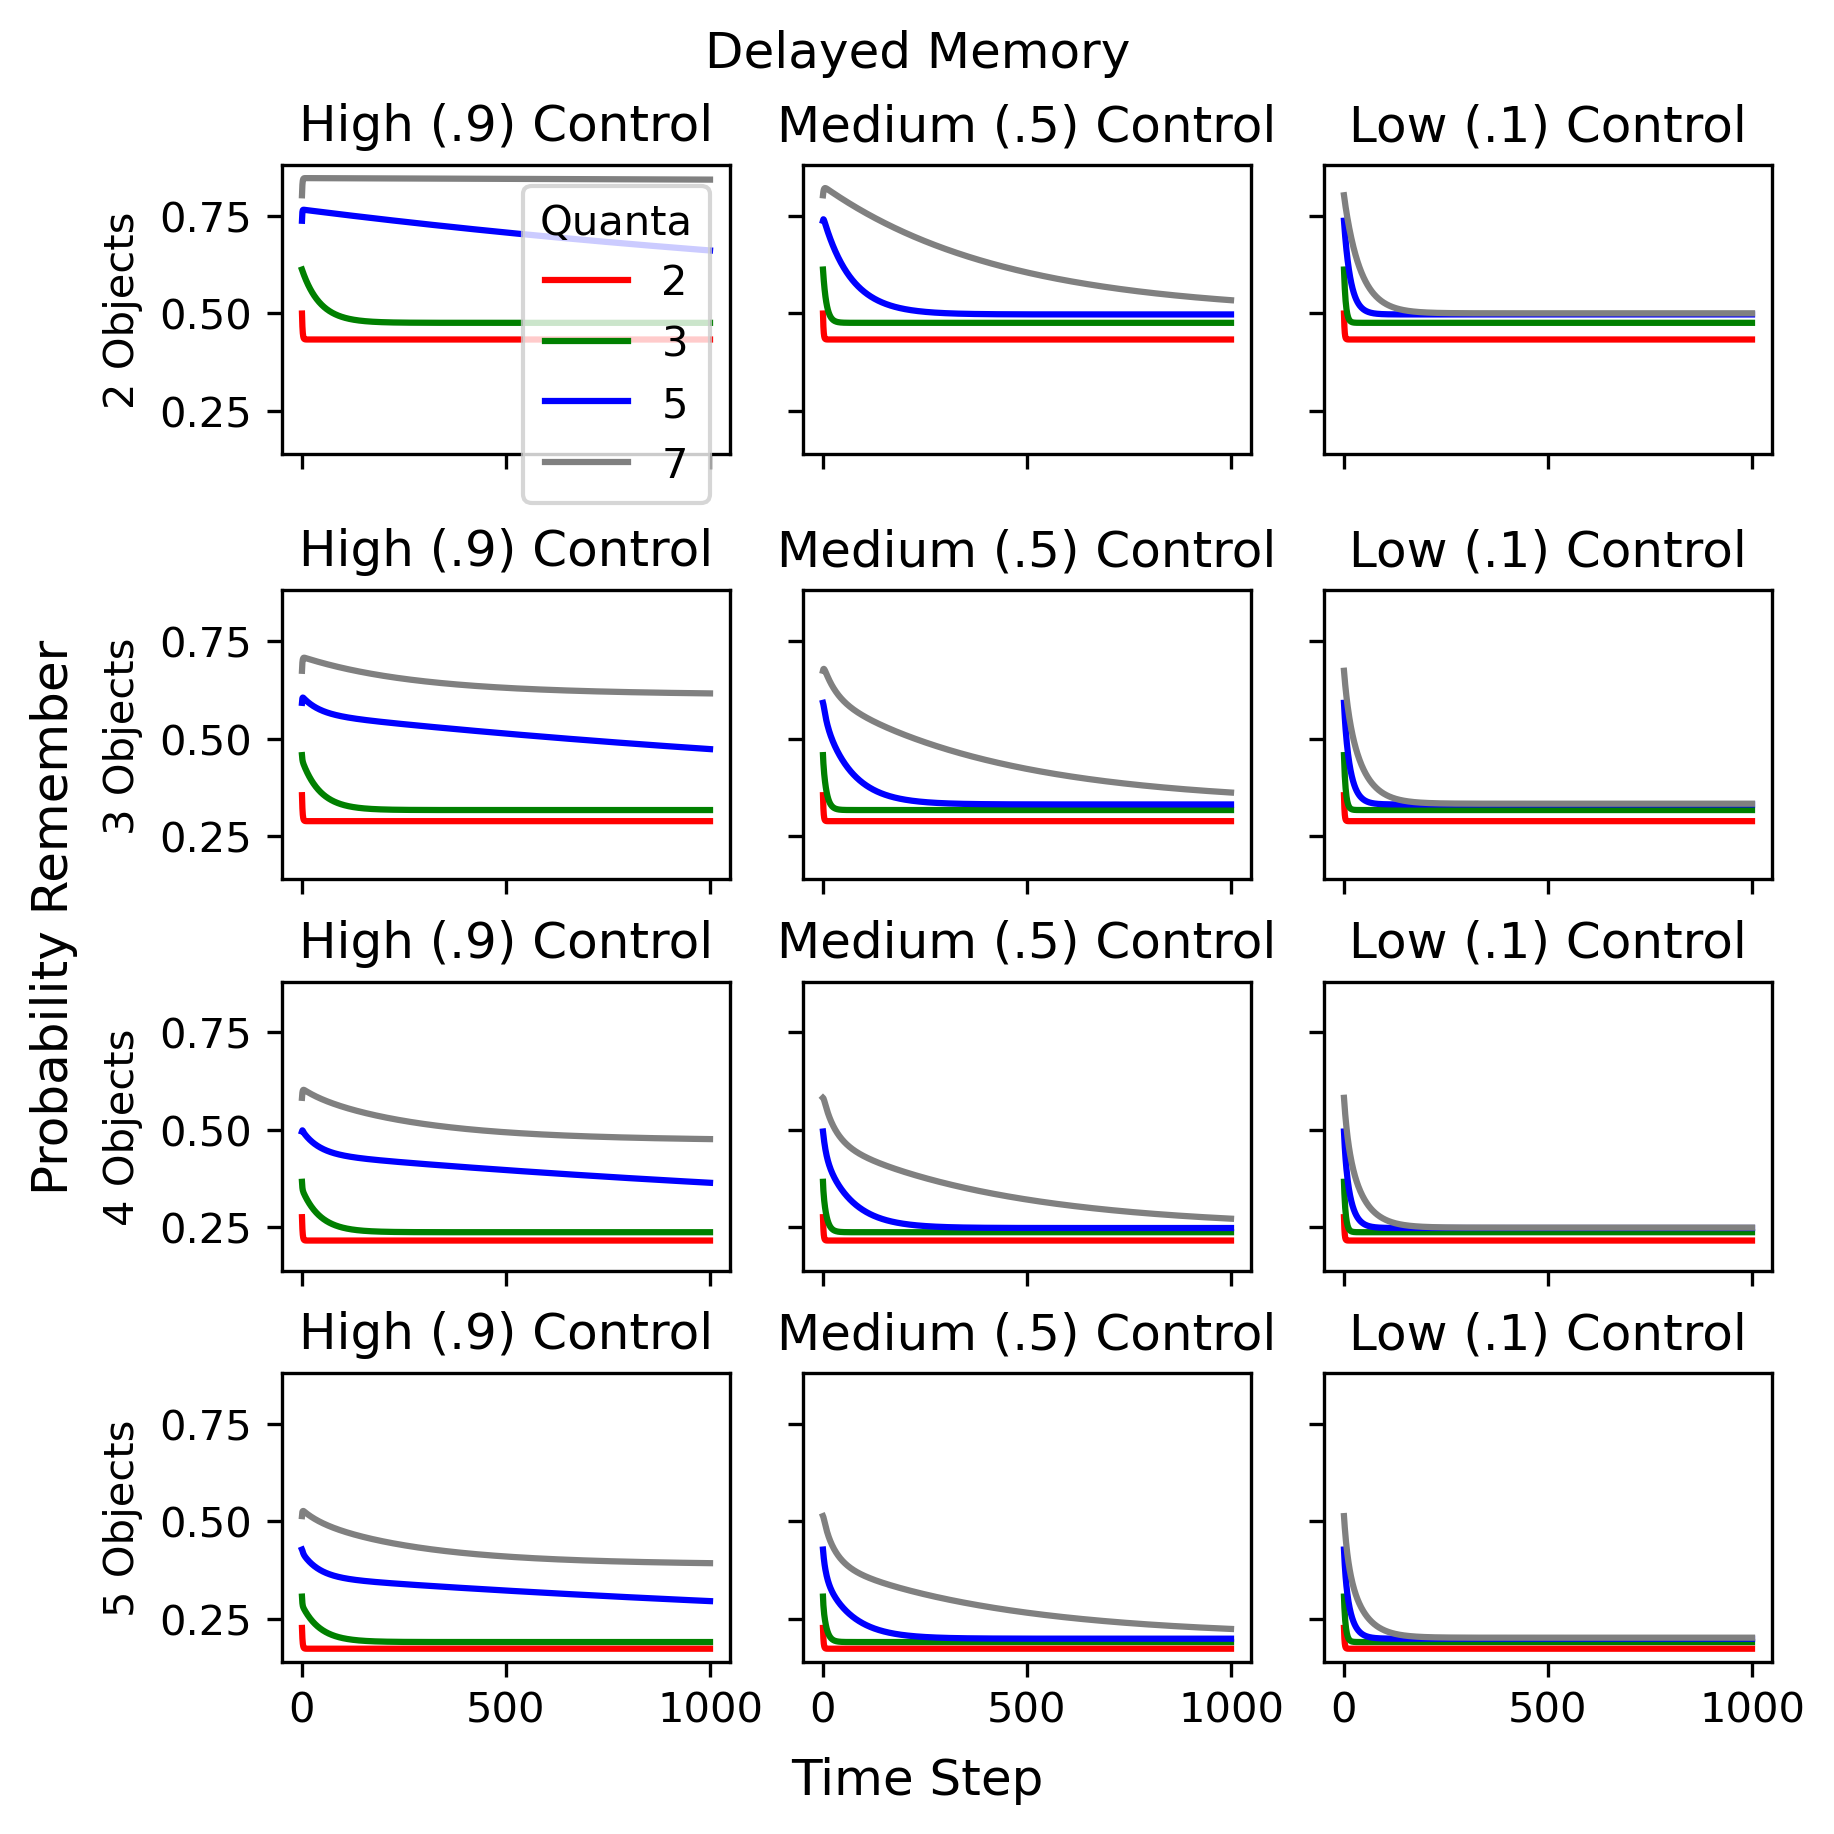

Python: None

In [12]:
colors = ["r", "g", "b", "gray"]


eps_label = ["High (.9)", "Medium (.5)", "Low (.1)"]

fig,ax = subplots(NO, NE, figsize=(6,6), dpi=300, constrained_layout=true, sharey=true, sharex = true)
for obj_idx = 1:NO
    for q_idx in 1:NQ
        for eps_idx in 1:NE
            ax[obj_idx - 1, eps_idx-1].plot(1:N_TimeSteps, prob_remember_object_eps_quant[:,obj_idx, q_idx,eps_idx], label = string(Quanta_Vals[q_idx]), c = colors[q_idx])
        
        # ax[q_idx-1].set_xlabel("Time Step")
            if q_idx == NQ
                ax[obj_idx-1,eps_idx-1].set_title(string(eps_label[eps_idx], " Control"))
            end
        end

    end
    ax[obj_idx-1,0].set_ylabel(string(N_Object_Vals[obj_idx], " Objects"))

end

ax[0,0].legend(title = "Quanta")
fig.suptitle("Delayed Memory")
# ax[0].set_ylim(.55,.85)

fig.supxlabel("Time Step")
fig.supylabel("Probability Remember")

savefig("DelayedMemory.png")

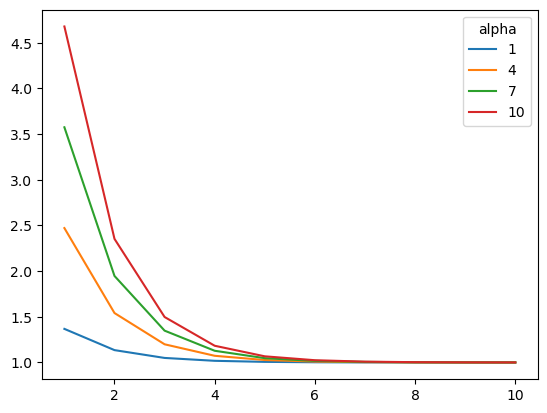

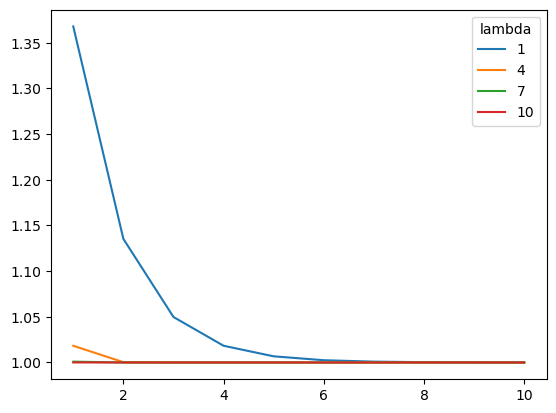

Python: <matplotlib.legend.Legend object at 0x2a3b5ec10>

In [5]:
function exp_func(x, alpha, lambda, beta)
    return alpha*exp.(-x .* lambda) .+ beta
end

lambda = 1
beta = 1
x = 1:10

fig,ax = subplots(1)

for alpha = 1:3:10
    ax.plot(x,exp_func(x, alpha, lambda, beta), label = string(alpha))
end
ax.legend(title = "alpha")

fig,ax = subplots(1)

alpha = 1
beta = 1
for lambda = 1:3:10
    ax.plot(x,exp_func(x, alpha, lambda, beta), label = string(lambda))
end
ax.legend(title = "lambda")

In [6]:

N_Object_Vals = [2, 3, 4, 5]
NO = length(N_Object_Vals)
Quanta_Vals = [2, 3, 5, 7]
NQ = length(Quanta_Vals)
eps_vals = [.1, .5, .9]
NE = length(eps_vals)

N_TimeSteps = 1000


1000

In [13]:
include("MDPModelFunctions.jl")

N_Object_Vals = [2, 3, 4, 5]
NO = length(N_Object_Vals)
Quanta_Vals = [2, 3, 5, 7]
NQ = length(Quanta_Vals)
eps_vals = [.1, .5, .9]
NE = length(eps_vals)

#N_TimeSteps = 1000

N_TimeSteps_Pre = 500
N_TimeSteps_Post = 500
N_TimeSteps = N_TimeSteps_Pre + N_TimeSteps_Post

prob_remember_object_cued_eps_quant = zeros(N_TimeSteps, NO, NQ, NE)
prob_remember_object_uncued_eps_quant = zeros(N_TimeSteps, NO, NQ, NE)

for obj_idx = 1:NO
    


    for eps_idx in 1:NE
        print(string("NUM OBJ: ", N_Object_Vals[eps_idx]))


        print(string("Epsilon: ", eps_vals[eps_idx]))

        for q_idx in 1:NQ

            N_Quanta = Quanta_Vals[q_idx]
            epsilon = eps_vals[eps_idx]
            N_Objects = N_Object_Vals[obj_idx]

            prob_remember_object_cued, prob_remember_object_uncued = simulate_retrocue(N_Quanta, N_Objects, epsilon, N_TimeSteps_Pre, N_TimeSteps_Post)

            prob_remember_object_cued_eps_quant[:,obj_idx, q_idx, eps_idx] = prob_remember_object_cued
            prob_remember_object_uncued_eps_quant[:,obj_idx, q_idx, eps_idx] = prob_remember_object_uncued
        end
    end
end

NUM OBJ: 2Epsilon: 0.1NUM OBJ: 3Epsilon: 0.5NUM OBJ: 4Epsilon: 0.9NUM OBJ: 2Epsilon: 0.1NUM OBJ: 3Epsilon: 0.5NUM OBJ: 4Epsilon: 0.9NUM OBJ: 2Epsilon: 0.1NUM OBJ: 3Epsilon: 0.5NUM OBJ: 4Epsilon: 0.9NUM OBJ: 2Epsilon: 0.1NUM OBJ: 3Epsilon: 0.5NUM OBJ: 4Epsilon: 0.9

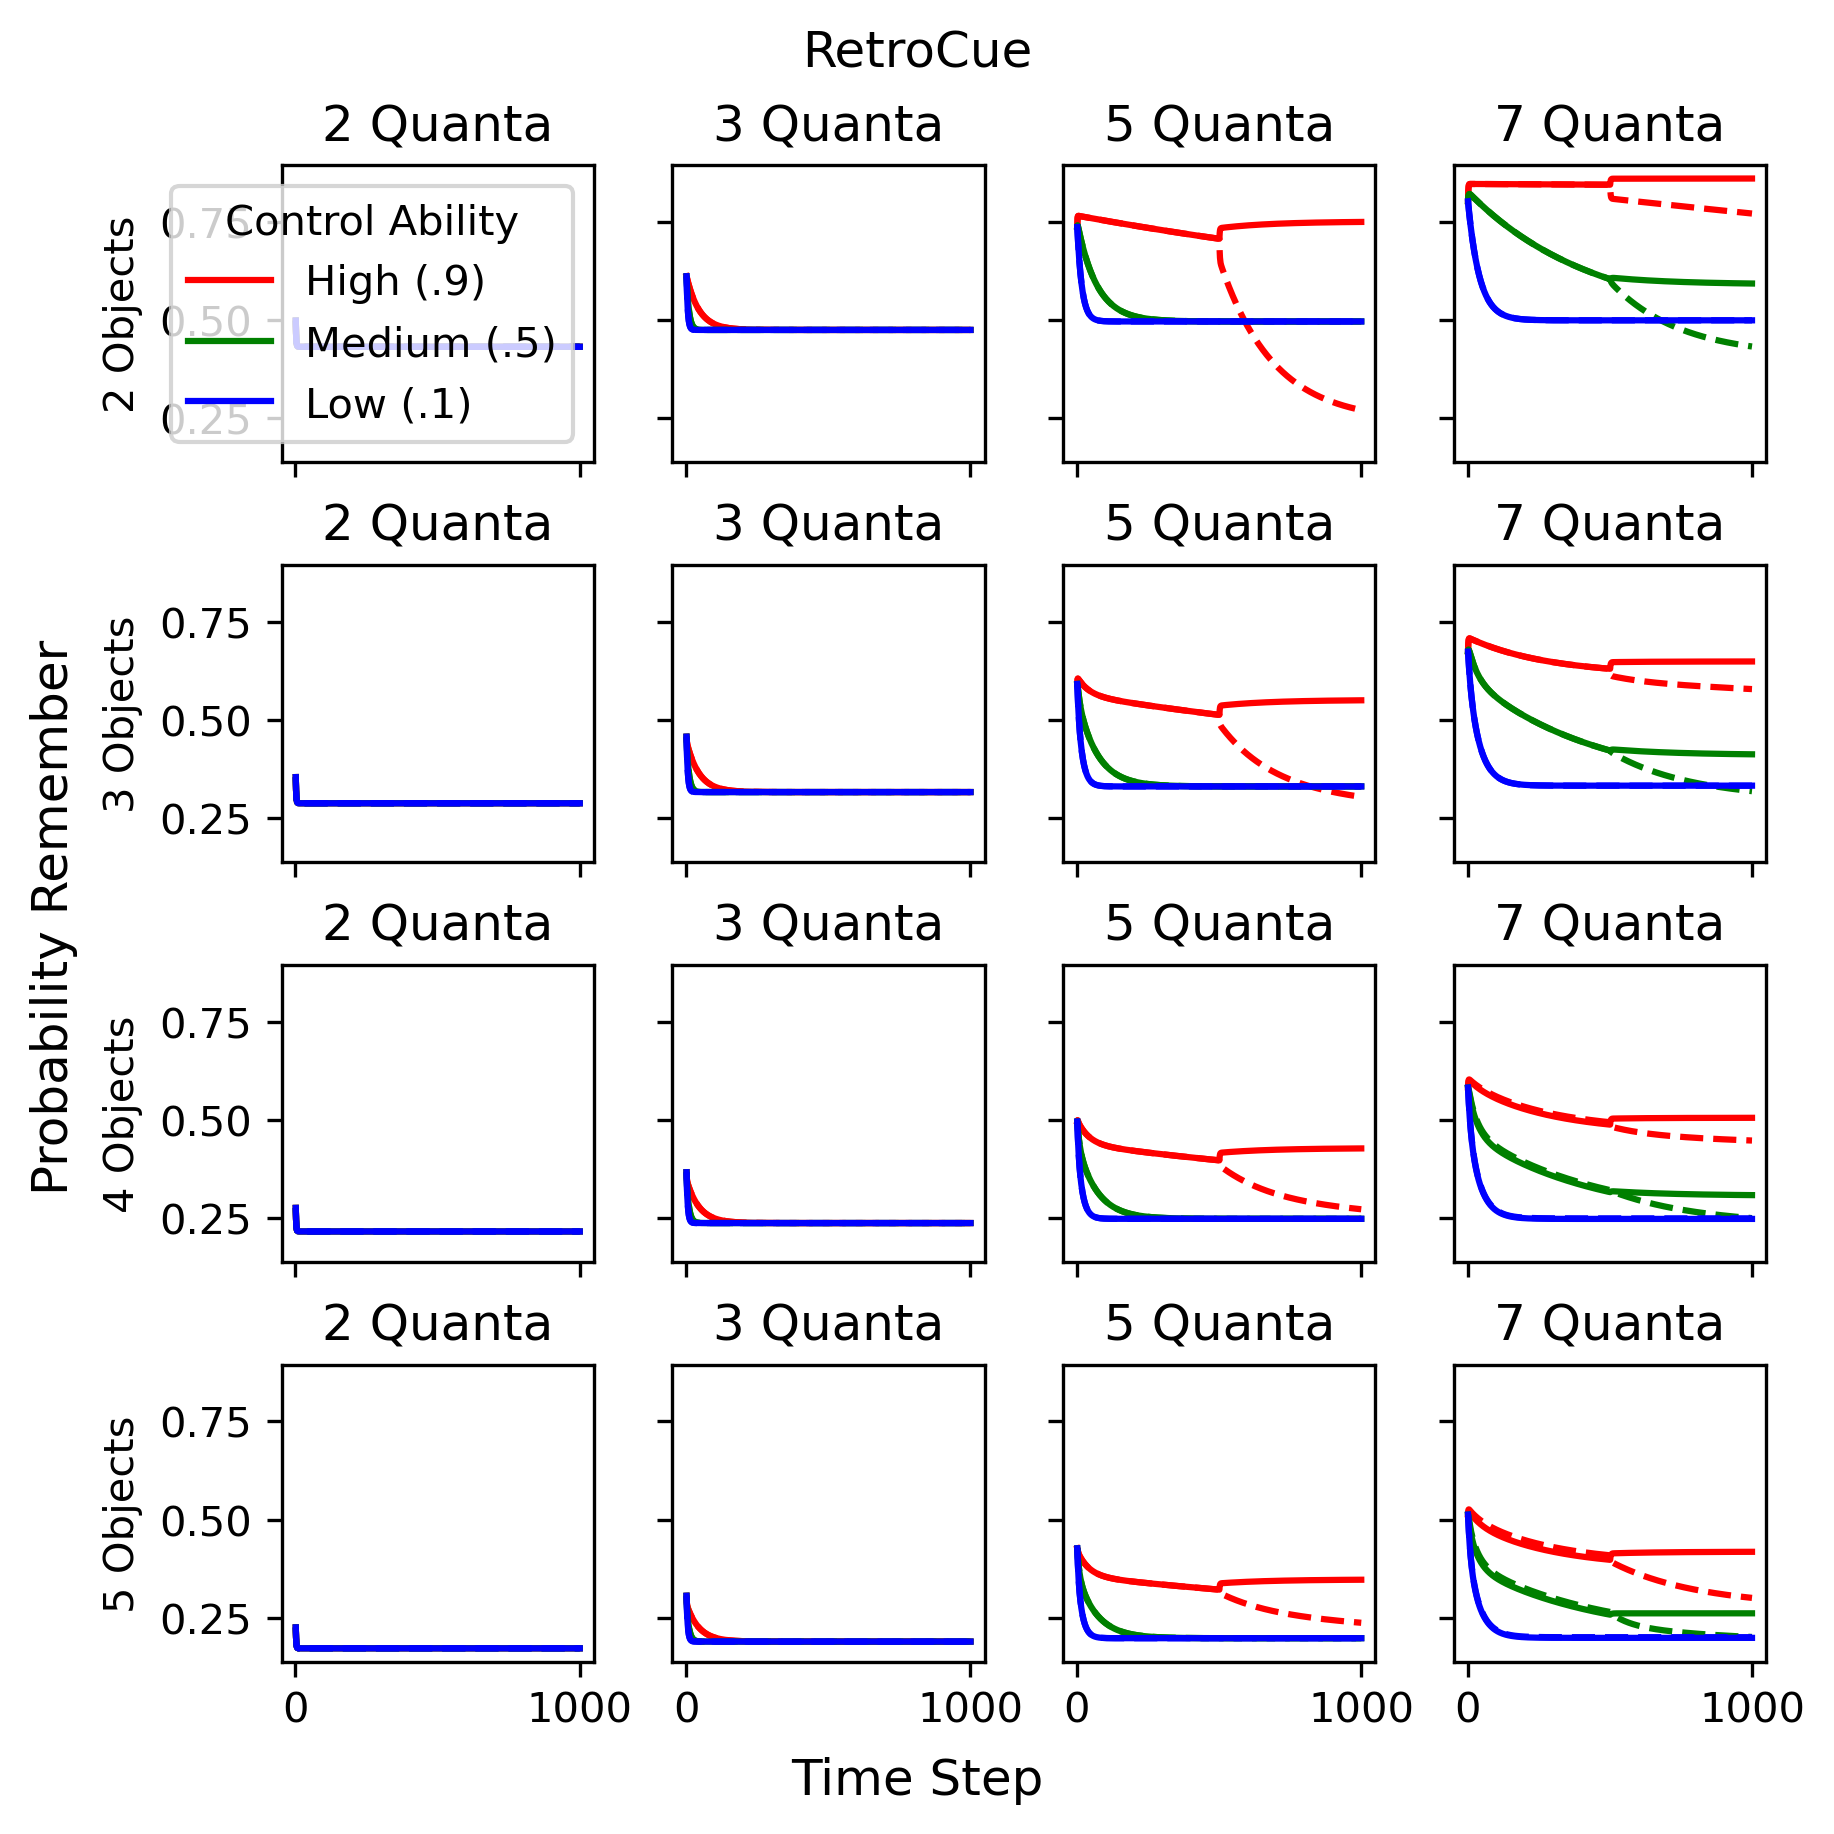

Python: None

In [15]:
colors = ["r", "g", "b"]


eps_label = ["High (.9)", "Medium (.5)", "Low (.1)"]

fig,ax = subplots(NO, NQ, figsize=(6,6), dpi=300, constrained_layout=true, sharey=true, sharex = true)
for obj_idx = 1:NO
    for q_idx in 1:NQ
        for eps_idx in 1:NE
            ax[obj_idx - 1, q_idx-1].plot(1:N_TimeSteps, prob_remember_object_cued_eps_quant[:,obj_idx, q_idx,eps_idx], label = eps_label[eps_idx], c = colors[eps_idx])
            ax[obj_idx - 1, q_idx-1].plot(1:N_TimeSteps, prob_remember_object_uncued_eps_quant[:,obj_idx, q_idx,eps_idx], c = colors[eps_idx], ls = "--")

        end
        # ax[q_idx-1].set_xlabel("Time Step")
        ax[obj_idx-1,q_idx-1].set_title(string(Quanta_Vals[q_idx], " Quanta"))
        

    end
    ax[obj_idx-1,0].set_ylabel(string(N_Object_Vals[obj_idx], " Objects"))

end

ax[0,0].legend(title = "Control Ability")
fig.suptitle("RetroCue")
# ax[0].set_ylim(.55,.85)

fig.supxlabel("Time Step")
fig.supylabel("Probability Remember")

savefig("RetroCue.png")

In [9]:
colors = ["r", "g", "b"]

eps_label = ["High (.9)", "Medium (.5)", "Low (.1)"]

fig,ax = subplots(1, NQ, figsize=(6,3), dpi=300, constrained_layout=true, sharey=true, sharex = true)

for q_idx in 1:NQ
    for eps_idx in 1:NE
        ax[q_idx-1].plot(1:N_TimeSteps, prob_remember_object_cued_eps_quant[:,q_idx,eps_idx], label = eps_label[eps_idx], color = colors[eps_idx])
        ax[q_idx-1].plot(1:N_TimeSteps, prob_remember_object_uncued_eps_quant[:,q_idx,eps_idx], ls = "--", colors[eps_idx])

    end
    # ax[q_idx-1].set_xlabel("Time Step")
    ax[q_idx-1].set_title(string(Quanta_Vals[q_idx], " Quanta"))
    # ax[q_idx-1].axvline(N_TimeSteps_Pre, ymin = .1, ymax = .9, alpha = .5, color = "k", lw = 1)

end

dummy_lines = [ax[0].plot([],[], c="gray")[0], ax[0].plot([],[], c="gray", ls = "--")[0]]

# ax[0].set_ylabel("Probability Remember")
ax[1].legend(title = "Control Ability", loc=1)
ax[0].legend([dummy_lines[1],dummy_lines[2]], ["Cued", "Uncued"])

fig.suptitle("Retrocue")
fig.supxlabel("Time Step (Cue on at 100)")
fig.supylabel("Probability Remember")

# ax[0].set_ylim(.55,.85)
savefig("RetroCue.png")

LoadError: BoundsError: attempt to access 1000×4×4×3 Array{Float64, 4} at index [1:1000, 1, 1]